## 1. Planejamento  

 - Verificar a correlação entre os tipos de  delitos e suas incidencias
 - Fazer previsões do crescimento de determinados tipos de delitos
 - Relacionar com cresccimento da população

 ## 2. Importando e praparando a base de dados

In [1]:
#  importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- importando os dados dos delitos

 link para base de dados original: (https://www.kaggle.com/adamschroeder/crimes-new-york-city?select=Crime_Column_Description.csv)

In [2]:
delitos_ny = pd.read_csv('select_ny.csv')

In [3]:
delitos_ny.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,0 days 00:05:00.000000000,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER
1,2015-12-31,2015-12-31,2015-12-31,23:18:00,23:25:00,0 days 00:07:00.000000000,FELONY ASSAULT,nao_concluido,crime,N.Y. POLICE DEPT,BROOKLYN,em_frente,DRUG STORE
2,2015-12-31,2015-12-31,2015-12-31,23:15:00,23:15:00,0 days 00:00:00.000000000,DANGEROUS WEAPONS,concluido,crime,N.Y. POLICE DEPT,BRONX,em_frente,STREET
3,2015-12-31,2015-12-31,2015-12-31,23:15:00,23:30:00,0 days 00:15:00.000000000,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,RESIDENCE - APT. HOUSE
4,2015-12-31,2015-12-31,2015-12-31,23:10:00,23:10:00,0 days 00:00:00.000000000,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,dentro,DRUG STORE


 - convertendo as colunas data para Datetime

In [4]:
delitos_ny['data_da_ocorrencia'] = pd.to_datetime(delitos_ny['data_da_ocorrencia'])

In [5]:
delitos_ny['data_final_da_ocorrencia'] = pd.to_datetime(delitos_ny['data_final_da_ocorrencia'])

In [6]:
delitos_ny['data_comunicacao_policia'] = pd.to_datetime(delitos_ny['data_comunicacao_policia'])

 - pegando apenas os delitos concluídos nos anos 2014 e 2015

In [7]:
delitos_ny = delitos_ny.query('conclusao == "concluido" and data_da_ocorrencia >= "2014-01-01"')

In [8]:
delitos_ny['data_da_ocorrencia'].dt.year.value_counts()

2014    303854
2015    294305
Name: data_da_ocorrencia, dtype: int64

 - Classificando os delitos apenas como centro ou fora dos estabelecimentos 

In [9]:
#  classificando os delitos apenas como sendo dentro / fora  dos estabelecimentos


new_local_da_ocorrencia = {'atras': "fora", 'dentro': "dentro", 'em_frente': "fora", 
                           'oposto': "fora" }
delitos_ny['local_da_ocorrencia'] = delitos_ny['local_da_ocorrencia'].map(new_local_da_ocorrencia)

In [10]:
delitos_ny.local_da_ocorrencia.value_counts()

dentro    387272
fora      210887
Name: local_da_ocorrencia, dtype: int64

 -  Importando os dados da população de 2010-2030

In [11]:
populacao = pd.read_csv('populacao_2010_2030.csv')

In [12]:
populacao

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,...,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
0,Total Population,NYC Total,"7,891,957",100%,"7,781,984",100%,"7,894,862",100%,"7,071,639",100%,...,"8,008,278",100%,"8,242,624",100%,"8,550,971",100%,"8,821,027",100%,"9,025,145",100%
1,Total Population,Bronx,"1,451,277",18.39%,"1,424,815",18.31%,"1,471,701",18.64%,"1,168,972",16.53%,...,"1,332,650",16.64%,"1,385,108",16.8%,"1,446,788",16.92%,"1,518,998",17.22%,"1,579,245",17.5%
2,Total Population,Brooklyn,"2,738,175",34.7%,"2,627,319",33.76%,"2,602,012",32.96%,"2,230,936",31.55%,...,"2,465,326",30.78%,"2,552,911",30.97%,"2,648,452",30.97%,"2,754,009",31.22%,"2,840,525",31.47%
3,Total Population,Manhattan,"1,960,101",24.84%,"1,698,281",21.82%,"1,539,233",19.5%,"1,428,285",20.2%,...,"1,537,195",19.2%,"1,585,873",19.24%,"1,638,281",19.16%,"1,676,720",19.01%,"1,691,617",18.74%
4,Total Population,Queens,"1,550,849",19.65%,"1,809,578",23.25%,"1,986,473",25.16%,"1,891,325",26.75%,...,"2,229,379",27.84%,"2,250,002",27.3%,"2,330,295",27.25%,"2,373,551",26.91%,"2,412,649",26.73%
5,Total Population,Staten Island,"191,555",2.43%,"221,991",2.85%,"295,443",3.74%,"352,121",4.98%,...,"443,728",5.54%,"468,730",5.69%,"487,155",5.7%,"497,749",5.64%,"501,109",5.55%


 - Tratando os dados do DataFrame "populacao"

In [16]:
populacao=populacao.iloc[:,[0,13,15,17]]

In [17]:
#  renomenando as colunas 

populacao.columns = ['Bairro','Total_poplacao_2010','Total_poplacao_2020','Total_poplacao_2030']

In [18]:
populacao

,Bairro,Total_poplacao_2010,Total_poplacao_2020,Total_poplacao_2030
0,NYC Total,"8,242,624","8,550,971","8,821,027"
1,Bronx,"1,385,108","1,446,788","1,518,998"
2,Brooklyn,"2,552,911","2,648,452","2,754,009"
3,Manhattan,"1,585,873","1,638,281","1,676,720"
4,Queens,"2,250,002","2,330,295","2,373,551"
5,Staten Island,"468,730","487,155","497,749"


 - Retirando as vírgulas dos números e convertendo as colunas pra um formato numérico

In [19]:
lista_cols=['Total_poplacao_2010','Total_poplacao_2020','Total_poplacao_2030']

for i in lista_cols:
    populacao[i]=populacao[i].astype(str)
    populacao[i]=populacao[i].str.replace(",","")
    populacao[i]=pd.to_numeric(populacao[i])

<ipython-input-19-a986452c0b7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  populacao[i]=populacao[i].astype(str)
<ipython-input-19-a986452c0b7a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  populacao[i]=populacao[i].str.replace(",","")
<ipython-input-19-a986452c0b7a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [27]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Bairro               6 non-null      object
 1   Total_poplacao_2010  6 non-null      int64 
 2   Total_poplacao_2020  6 non-null      int64 
 3   Total_poplacao_2030  6 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 320.0+ bytes


 ## 3. Análise exploratória de dados

In [22]:
delitos_ny.describe().T

,count,unique,top,freq,first,last
data_da_ocorrencia,598159,730,2014-01-01 00:00:00,1424,2014-01-01,2015-12-31
data_final_da_ocorrencia,598159,732,2014-10-17 00:00:00,1024,2014-01-01,2016-01-11
data_comunicacao_policia,598159,730,2014-08-20 00:00:00,1024,2014-01-01,2015-12-31
hora_da_ocorrencia,598159,1440,12:00:00,17137,NaT,NaT
hora_termino_da_ocorrencia,598159,1440,12:00:00,10780,NaT,NaT
duracao_da_ocorrencia,598159,2759,0 days 00:05:00.000000000,80179,NaT,NaT
descricao_da_ofensa,598159,63,PETIT LARCENY,117139,NaT,NaT
conclusao,598159,1,concluido,598159,NaT,NaT
nivel_de_ofensa,598159,3,contravencao,330372,NaT,NaT
jurisdicao,598159,19,N.Y. POLICE DEPT,534474,NaT,NaT


In [23]:
populacao.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_poplacao_2010,6.0,2.747541e+06,2.788549e+06,468730.0,1435299.25,1917937.5,2477183.75,8242624.0
Total_poplacao_2020,6.0,2.850324e+06,2.892476e+06,487155.0,1494661.25,1984288.0,2568912.75,8550971.0
Total_poplacao_2030,6.0,2.940342e+06,2.984012e+06,497749.0,1558428.50,2025135.5,2658894.50,8821027.0


In [39]:
# plt.figure(figsize=(10, 6))
# plt.scatter(populacao['Bairro'], populacao['Total_poplacao_2010'],alpha=1)
# #x = [0, 400, 1000]
# #y = [0, 10000, 20000]
# #plt.plot(x, y, c='r')
# plt.xlabel('bairro')
# plt.ylabel('populacao')

Text(0.5, 1.0, 'Crescimento da População de Nova York por bairro')

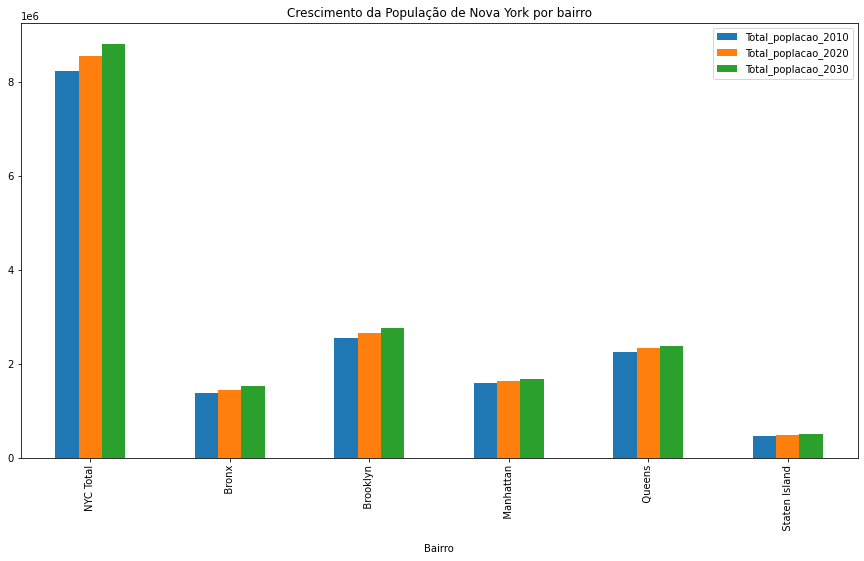

In [35]:
# plt.figure()
populacao.plot.bar(figsize=(15, 8))
titulo='Crescimento da População de Nova York por bairro'
plt.title(titulo)

### 1-  Nivel de ofensa
  
  - contravenção
  - crime
  - violação

In [55]:
delitos_ny.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,0 days 00:05:00.000000000,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,fora,OTHER
2,2015-12-31,2015-12-31,2015-12-31,23:15:00,23:15:00,0 days 00:00:00.000000000,DANGEROUS WEAPONS,concluido,crime,N.Y. POLICE DEPT,BRONX,fora,STREET
3,2015-12-31,2015-12-31,2015-12-31,23:15:00,23:30:00,0 days 00:15:00.000000000,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,RESIDENCE - APT. HOUSE
4,2015-12-31,2015-12-31,2015-12-31,23:10:00,23:10:00,0 days 00:00:00.000000000,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,dentro,DRUG STORE
5,2015-12-31,2015-12-31,2015-12-31,23:05:00,23:15:00,0 days 00:10:00.000000000,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,FAST FOOD


In [61]:
delitos_ny.conclusao.value_counts()

concluido    598159
Name: conclusao, dtype: int64

- delitos pratidados no inteior dos estabelecimentos

In [64]:
delitos_praticados_dentro=delitos_ny.iloc[:,[0,6,8,9,10,11,12]]

In [65]:
delitos_praticados_dentro=delitos_praticados_dentro.query('local_da_ocorrencia == "dentro"')

In [71]:
delitos_ny[['descricao_da_ofensa','nivel_de_ofensa']].describe()

,descricao_da_ofensa,nivel_de_ofensa
count,598159,598159
unique,63,3
top,PETIT LARCENY,contravencao
freq,117139,330372


In [40]:
nivel_de_ofensa=delitos_ny.loc[:,['data_da_ocorrencia','nivel_de_ofensa']]

In [41]:
nivel_de_ofensa.head()

,data_da_ocorrencia,nivel_de_ofensa
0,2015-12-31,contravencao
2,2015-12-31,crime
3,2015-12-31,contravencao
4,2015-12-31,contravencao
5,2015-12-31,contravencao


In [42]:
nivel_de_ofensa = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.nivel_de_ofensa ).reset_index()

In [ ]:
nivel_de_ofensa=pd.get_dummies(nivel_de_ofensa)

In [43]:
nivel_de_ofensa.head()

nivel_de_ofensa,data_da_ocorrencia,contravencao,crime,violacao
0,2014-01-01,855,416,153
1,2014-01-02,415,231,83
2,2014-01-03,341,201,101
3,2014-01-04,396,208,83
4,2014-01-05,390,201,86


In [44]:
nivel_de_ofensa.describe()

nivel_de_ofensa,contravencao,crime,violacao
count,730.000000,730.000000,730.000000
mean,452.564384,254.219178,112.612329
std,57.527467,32.332865,17.297418
min,240.000000,142.000000,67.000000
25%,419.250000,234.000000,100.250000
50%,454.000000,254.000000,112.000000
75%,486.750000,273.000000,124.000000
max,855.000000,416.000000,171.000000


In [45]:
nivel_de_ofensa.corr()

nivel_de_ofensa,contravencao,crime,violacao
nivel_de_ofensa,,,
contravencao,1.000000,0.670163,0.490169
crime,0.670163,1.000000,0.510484
violacao,0.490169,0.510484,1.000000


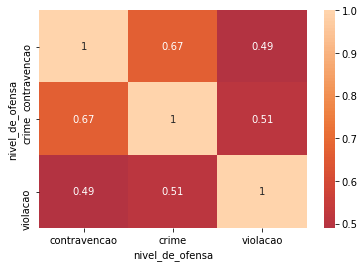

In [47]:
sns.heatmap(nivel_de_ofensa.corr(), center = 0, annot=True)

 - Visualizando a distibuição dos delitos classificados como crime, contravenção e violação, nos anos de 2014 e 2015.

In [ ]:
nivel_de_ofensa.plot()

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,6))
nivel_de_ofensa.plot(x='data_da_ocorrencia',y='contravencao',kind='hist',ax=ax[0],title='contravencao');
nivel_de_ofensa.plot(x='data_da_ocorrencia',y='crime',kind='count',ax=ax[1],title='crime');
nivel_de_ofensa.plot(x='data_da_ocorrencia',y='violacao',kind='count',ax=ax[2],title='violacao');
plt.tight_layout();

 - criando novo DataFrame colocando a data como índice

In [ ]:
nivel_de_ofensa_geral = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.nivel_de_ofensa )

In [ ]:
nivel_de_ofensa_geral.head()

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(nivel_de_ofensa_geral)
plt.xlabel('Data', fontsize=20)
plt.ylabel('Quantidade', fontsize=20)
legenda = ['contravenção','crime', 'violação']
plt.legend(legenda, fontsize=15)
plt.show()

 ### 2- Bairro

In [ ]:
qtde_ocorrencia_dia = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.bairro)

In [ ]:
qtde_ocorrencia_dia.head()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(qtde_ocorrencia_dia)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda = ['BRONX','BROOKLYN', 'MANHATTAN','QUEENS','STATEN ISLAND']
plt.legend(legenda, fontsize=10,loc=1)
plt.title('QUANTIDADE DE DELITOS PRATICADOS POR DIA EM CADA BAIRRO', fontsize=12)
plt.show()

### 3-  Local da ocorrencia

In [ ]:
local_da_ocorrencia = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.local_da_ocorrencia).reset_index()

In [ ]:
local_da_ocorrencia.info()

In [ ]:
local_da_ocorrencia.head()

In [ ]:
#  classificando os delitos apenas como sendo dentro / fora  dos estabelecimentos


new_local_da_ocorrencia = {'atras': "fora", 'dentro': "dentro", 'em_frente': "fora", 
                           'oposto': "fora" }
delitos_ny['local_da_ocorrencia'] = delitos_ny['local_da_ocorrencia'].map(new_local_da_ocorrencia)

In [ ]:
delitos_ny.local_da_ocorrencia.value_counts()

In [ ]:
local_da_ocorrencia = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.local_da_ocorrencia)
local_da_ocorrencia.head()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(local_da_ocorrencia)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda = ['dentro','fora']
plt.title(' DELITOS PRATICADOS DENTRO X FORA DOS ESTABELECIMENTOS', fontsize=12)
plt.legend(legenda, fontsize=15)
plt.show()

In [ ]:
# sns.set_palette('Accent')
# sns.set_style('darkgrid')
# ax=sns.lineplot(x='data_da_ocorrencia', y='dentro', data = local_da_ocorrencia)
# ax.figure.set_size_inches(14,7)
# ax.set_title('Delitos praticados dentro dos estabelecimentos', loc='left', fontsize=18)
# ax.set_xlabel('Data dos delitos', fontsize=14)
# ax.set_ylabel('Quatidade de delitos', fontsize=14)
# ax=ax

### 4 -  Descrição da ofensa

 - criando um dataframe data x descrição dos delitos

In [ ]:
descricao_da_ofensa = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.descricao_da_ofensa)

In [ ]:
descricao_da_ofensa.head()

- separando os delitos em :
 - delitos com maiores ocorrencias
 - delitos mais graves

### 4.1 Tipos de delitos mais frequentes

In [ ]:
delitos_ny.descricao_da_ofensa.value_counts().head()

In [ ]:
delitos_mais_frequentes = descricao_da_ofensa.loc[:,['PETIT LARCENY','HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES',
                                                     'CRIMINAL MISCHIEF & RELATED OF','GRAND LARCENY']]

In [ ]:
delitos_mais_frequentes.head()

In [ ]:
# plt.figure(figsize=(20,10))
# plt.plot(delitos_mais_frequentes)
# plt.xlabel('Data', fontsize=12)
# plt.ylabel('Quantidade', fontsize=12)
# legenda = ['PETIT LARCENY','HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES','CRIMINAL MISCHIEF & RELATED OF','GRAND LARCENY']
# plt.title('TIPOS DE DELITOS MAIS FREQUENTES', fontsize=12)
# plt.legend(legenda, fontsize=15)
# plt.show()

### 4.2 Delitos mais graves

In [ ]:
# delitos_ny.descricao_da_ofensa.value_counts().head(40)

In [ ]:
# 'HARRASSMENT 2','FELONY ASSAULT','DANGEROUS DRUGS','SEX CRIMES','DANGEROUS WEAPONS'

In [ ]:
delitos_mais_graves = descricao_da_ofensa.loc[:,['FELONY ASSAULT','DANGEROUS DRUGS',
                                                 'SEX CRIMES','DANGEROUS WEAPONS']]

In [ ]:
delitos_mais_graves.columns = ['crime_de_assalto','drogas_perigosas','crimes_sexuais','armas_perigosas']

In [ ]:
delitos_mais_graves.head()

In [ ]:
# plt.figure(figsize=(18,10))
# plt.plot(delitos_mais_graves)
# plt.xlabel('Data', fontsize=12)
# plt.ylabel('Quantidade', fontsize=12)
# legenda = ['crime_de_assalto','drogas_perigosas','crimes_sexuais','armas_perigosas']
# plt.title('TIPOS DE DELITOS MAIS graves', fontsize=12)
# plt.legend(legenda, fontsize=15, loc=1)
# plt.show()

 ## Selecionando a variável "crimes_sexuais" e observando seu comportamento ao longo do tempo

 - Crimes sexuais x tempo

In [ ]:
delitos_mais_graves.head()

In [ ]:
# plt.figure(figsize=(15,8))
# delitos_mais_graves.crimes_sexuais.plot()
# plt.xticks(rotation=45)
# plt.xlabel('Data')
# plt.ylabel('Quantidade')
# plt.tight_layout()

 - Criando o DataFrame "crimes_sexuais"

In [ ]:
crimes_sexuais = delitos_mais_graves.crimes_sexuais.to_frame()

 - Criando o arquivo CSV crimes_sexuais

In [ ]:
crimes_sexuais.to_csv('crimes_sexuais.csv', encoding = 'latin-1' )

 - Graficando "crimes_sexuais"

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(crimes_sexuais)
plt.title('Crimes Sexuais', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda= ['Crimes sexuais x Tempo']
plt.legend(legenda, fontsize=15, loc=1)
plt.show()

## Fazendo a decomposição sazonal

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
resultado = seasonal_decompose(crimes_sexuais, period=12)

 - obtendo os componentes

In [ ]:
tendencia = resultado.trend
sazonalidade = resultado.seasonal
residuo = resultado.resid

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(tendencia)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Tendencia')

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(sazonalidade)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Sazonalidade')

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(residuo)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Resíduo')
